# Test plane extraction for a single point cloud

In [11]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import time
import open3d as o3d

import planeslam.mesh as mesh
import planeslam.general as general
from planeslam.scanrep import ScanRep
from planeslam.extraction import scan_from_clusters

Read Point Cloud from pcd file

In [15]:
# Read in point cloud data
pcfile = os.path.join(os.getcwd(),'..', 'data', 'airsim', 'blocks_100.pcd')
pcd = o3d.io.read_point_cloud(pcfile)
P = np.asarray(pcd.points)

Cluster the points

In [16]:
start_time = time.time()
P = general.downsample(P, factor=5, axis=0)
m = mesh.lidar_mesh(P)
# Prune the mesh for long edges
m = mesh.prune_mesh(P, m, 10)
# Cluster the mesh with graph search
clusters, avg_normals = mesh.cluster_mesh_graph_search(P, m)
print("elapsed time: ", time.time() - start_time)

elapsed time:  0.28742527961730957


Text(0.5, 0.5, 'Y')

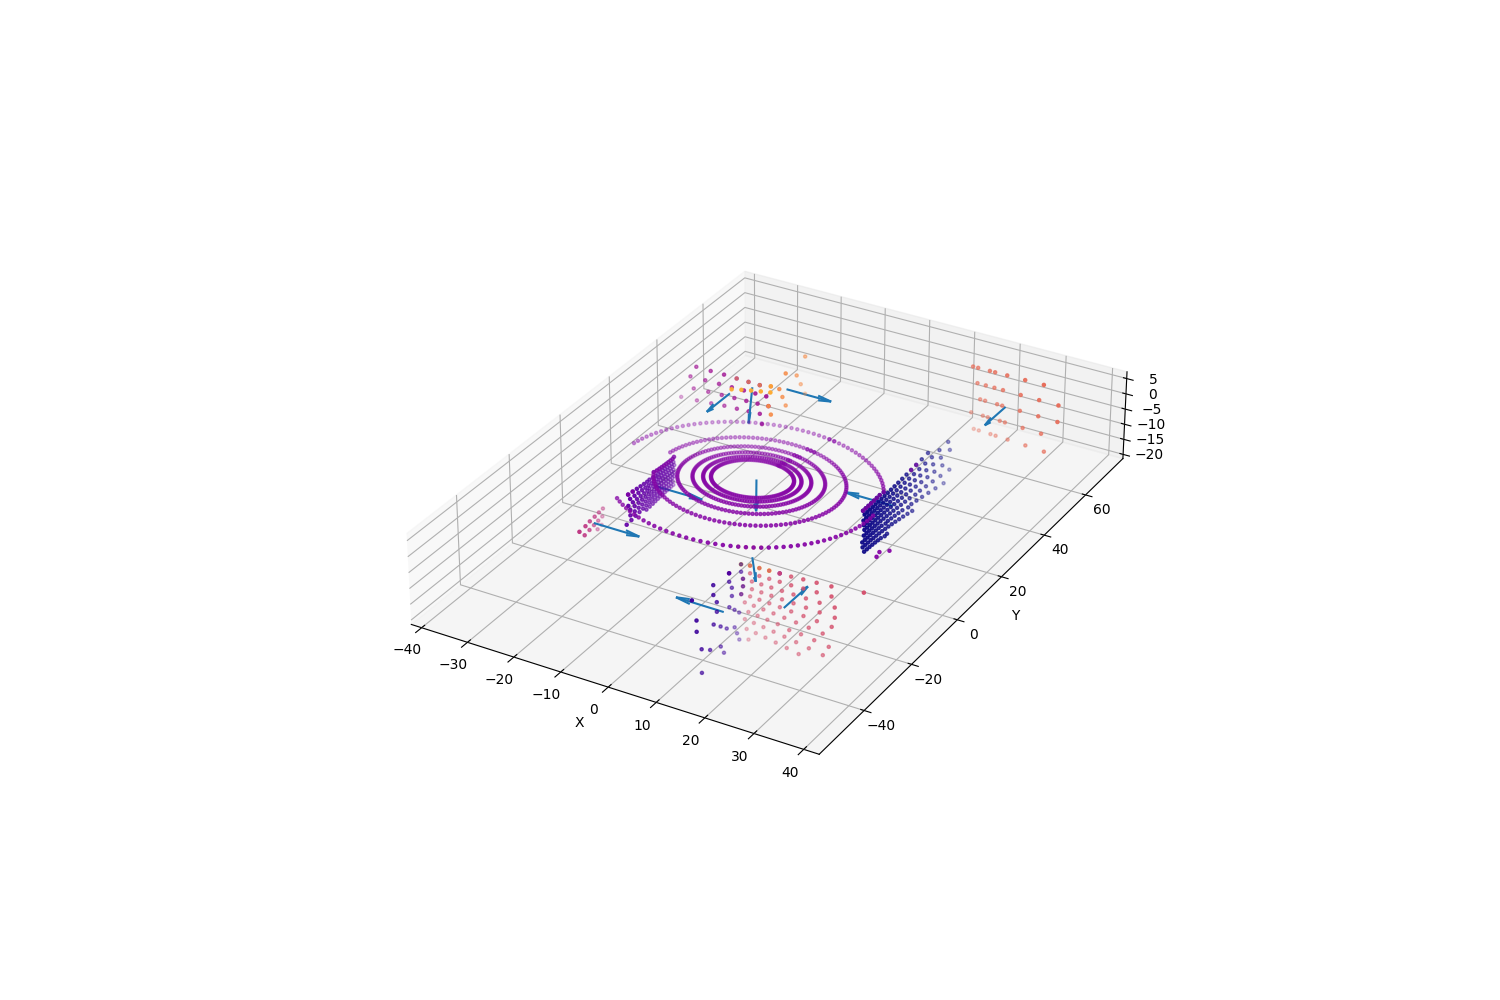

In [10]:
# Plot clusters
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cmap = cm.get_cmap('plasma')
cmap_idxs = int(len(cmap.colors) / len(clusters)) * np.arange(len(clusters))
colors = np.asarray(cmap.colors)[cmap_idxs,:]
for i, c in enumerate(clusters):
    cluster_pts_idxs = np.unique(m.simplices[c,:]) 
    cluster_pts = P[cluster_pts_idxs,:]
    ax.scatter3D(cluster_pts[:,0], cluster_pts[:,1], cluster_pts[:,2], color=colors[i,:], marker='.')  

    # Show normals
    c = np.mean(cluster_pts, axis=0)
    n = 10 * avg_normals[i]
    ax.quiver(c[0], c[1], c[2], n[0], n[1], n[2])

ax.set_box_aspect((np.ptp(P[:,0]), np.ptp(P[:,1]), np.ptp(P[:,2])))
ax.set_xlabel("X")
ax.set_ylabel("Y")


Text(0.5, 0.5, 'Y')

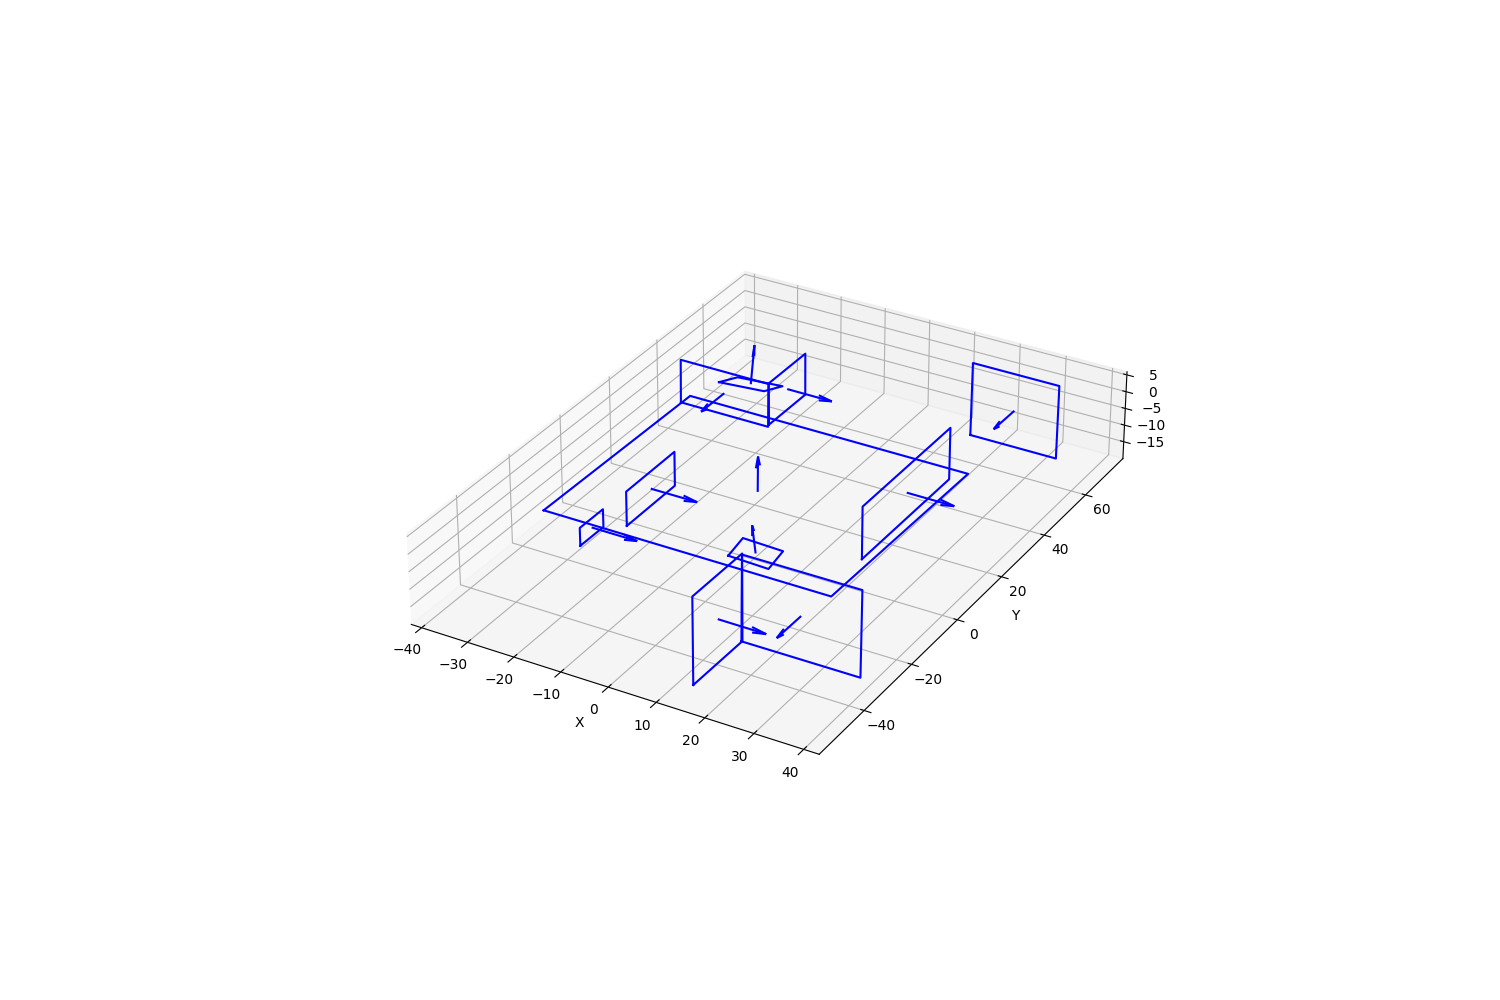

In [5]:
from planeslam.extraction import bd_plane_from_pts
from planeslam.plane import BoundedPlane

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i, c in enumerate(clusters):
    n = avg_normals[i][:,None]
    cluster_pts_idxs = np.unique(m.simplices[c,:]) 
    cluster_pts = P[cluster_pts_idxs,:]

    verts = bd_plane_from_pts(cluster_pts, n)
    bplane = BoundedPlane(verts)
    bplane.plot(ax, show_normal=True)

ax.set_box_aspect((np.ptp(P[:,0]), np.ptp(P[:,1]), np.ptp(P[:,2])))
ax.set_xlabel("X")
ax.set_ylabel("Y")

Extract planes

In [6]:
vertices, faces, normals = scan_from_clusters(P, m, clusters, avg_normals)
scan = ScanRep(vertices, faces, normals)

AttributeError: module 'planeslam.mesh' has no attribute 'scan_from_clusters'

Text(0.5, 0.5, 'Y')

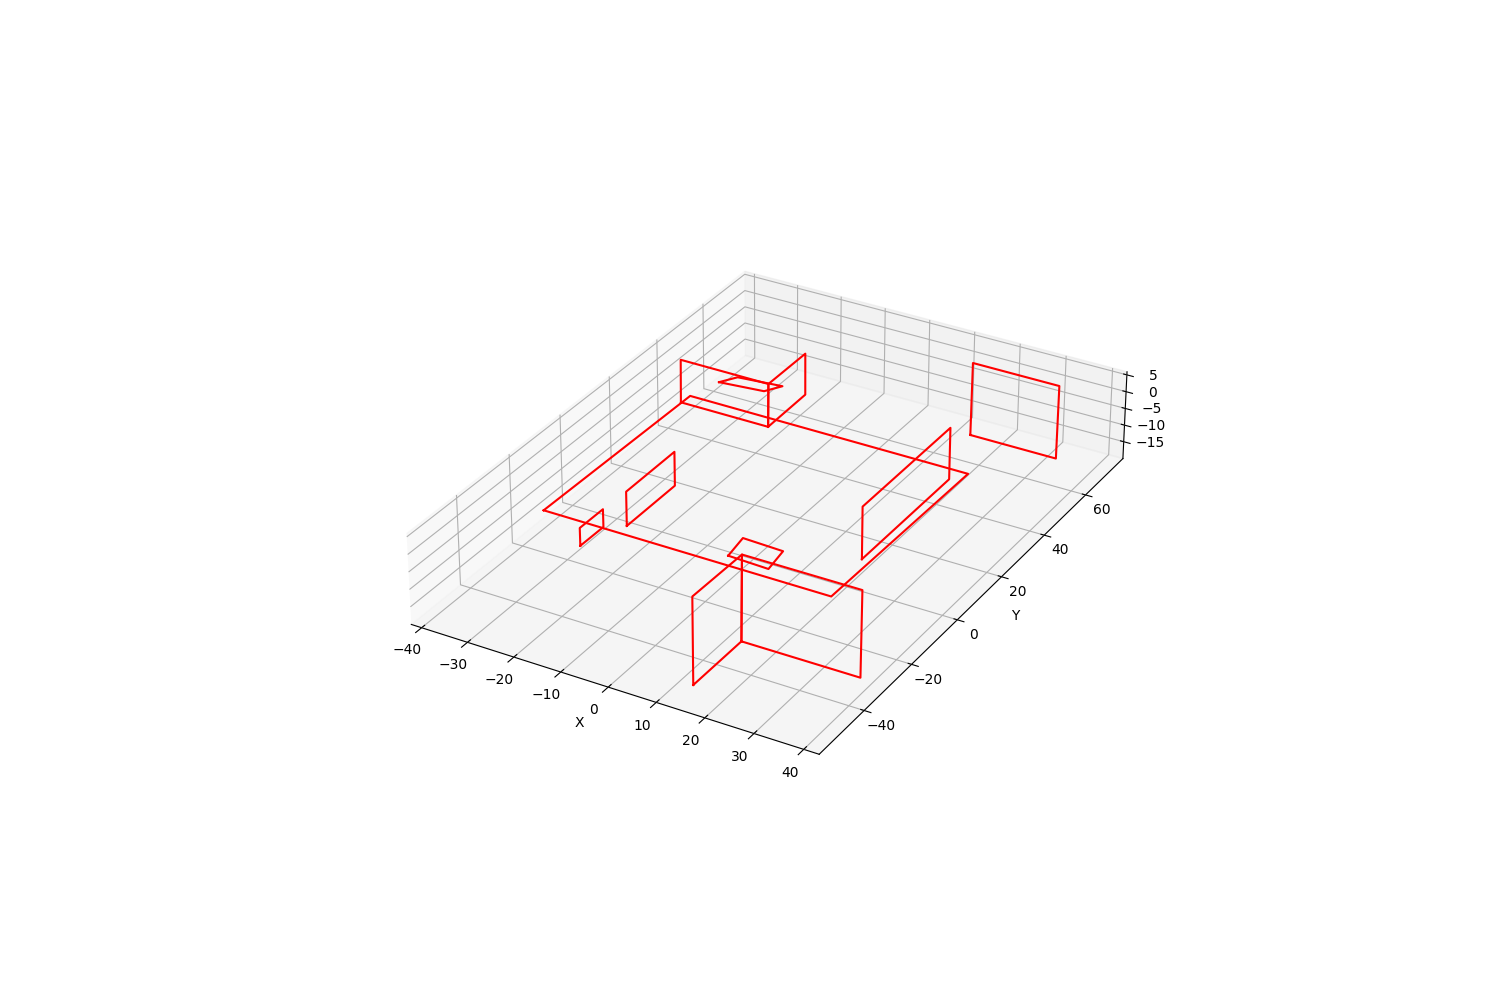

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

scan.plot(ax, color='r', show_normals=True)

ax.set_box_aspect((np.ptp(P[:,0]), np.ptp(P[:,1]), np.ptp(P[:,2])))
ax.set_xlabel("X")
ax.set_ylabel("Y")